In [4]:
import os
import numpy as np
import tensorflow as tf
from google.colab import drive

In [ ]:
device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

# 2. Data Understanding

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_dir="/content/drive/MyDrive/aifoundation/train/"
test_dir="/content/drive/MyDrive/aifoundation/test/"

In [7]:
os.listdir(train_dir+"dog")

['4.jpg', '9.jpg', '1.jpg', 'IMG_6467.JPG', 'IMG_6559.JPG']

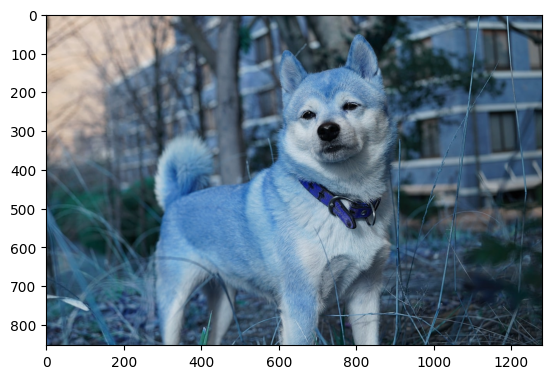

In [8]:
import cv2

image = cv2.imread(train_dir+"/dog/"+"9.jpg")
import matplotlib.pyplot as plt
plt.imshow(image)

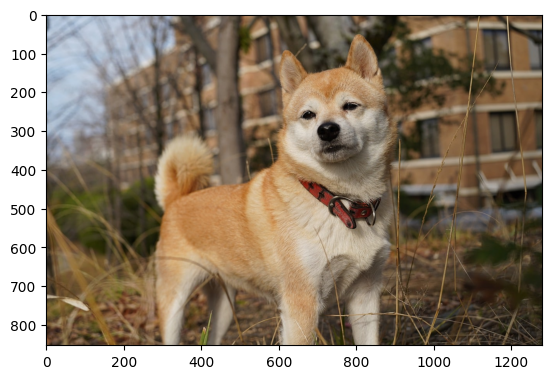

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

## 3. Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen_train = ImageDataGenerator(rescale = 1.0/255.)
datagen_test = ImageDataGenerator(rescale=1.0//255.)

In [ ]:
batch_size = 5
train_set  = datagen_train.flow_from_directory(train_dir,
                                            target_size = (200,200),
                                            #color_mode="grayscale",
                                             batch_size = batch_size,
                                            class_mode = "categorical", #if more than 2 categories: categorical, 2 categories: binary
                                            shuffle = True)
test_set = datagen_test.flow_from_directory(test_dir,
                                       target_size = (200,200),
                                       #color_mode="grayscale",
                                       batch_size = batch_size,
                                       class_mode = "categorical",
                                       shuffle = False)

Found 11 images belonging to 3 classes.
Found 13 images belonging to 3 classes.


In [ ]:
##

## 4. Modeling

In [ ]:
model  = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (200, 200, 3)),    #flatten က matrix table ကို row တခုထဲေပြာင်း, 3 က 3 channels RGB
        tf.keras.layers.Dense(1000, activation=tf.nn.relu),  #hidden layer 100 neurons ထား
        tf.keras.layers.Dense(500, activation=tf.nn.relu),
        tf.keras.layers.Dense(100, activation=tf.nn.relu),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax) # output layers with 3 labels (neurons)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',   #result ပိုေကာင်းအောင်ထည့်တာ
              loss = 'categorical_crossentropy',
              metrics =['acc'])   #accuracy

In [ ]:
num_of_training_images = 15
history = model.fit(train_set,
                    #steps_per_epoch=num_of_training_images//batch_size,  #epoch (run တဲ့အကြိမ်အရေအတွက်) တခုမှာ ၁၅ကြိမ်သွားမယ်
                    epochs=20,                   #count of runnning
                    verbose = 2,
                    shuffle = False)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 - 5s - 2s/step - acc: 0.0000e+00 - loss: 181.1404
Epoch 2/20
3/3 - 0s - 43ms/step - acc: 0.3636 - loss: 87.2721
Epoch 3/20
3/3 - 0s - 43ms/step - acc: 0.4545 - loss: 48.7676
Epoch 4/20
3/3 - 0s - 50ms/step - acc: 0.0909 - loss: 49.4170
Epoch 5/20
3/3 - 0s - 102ms/step - acc: 0.7273 - loss: 17.7276
Epoch 6/20
3/3 - 0s - 55ms/step - acc: 0.4545 - loss: 64.8434
Epoch 7/20
3/3 - 0s - 99ms/step - acc: 0.5455 - loss: 14.7937
Epoch 8/20
3/3 - 0s - 111ms/step - acc: 0.4545 - loss: 57.2701
Epoch 9/20
3/3 - 0s - 52ms/step - acc: 0.4545 - loss: 39.2655
Epoch 10/20
3/3 - 0s - 48ms/step - acc: 0.6364 - loss: 8.5072
Epoch 11/20
3/3 - 0s - 51ms/step - acc: 0.5455 - loss: 11.6602
Epoch 12/20
3/3 - 0s - 52ms/step - acc: 0.7273 - loss: 8.5467
Epoch 13/20
3/3 - 0s - 52ms/step - acc: 0.8182 - loss: 9.5033
Epoch 14/20
3/3 - 0s - 61ms/step - acc: 0.7273 - loss: 7.4899
Epoch 15/20
3/3 - 0s - 93ms/step - acc: 0.5455 - loss: 13.1433
Epoch 16/20
3/3 - 0s - 99ms/step - acc: 0.9091 - loss: 1.1076
Epoch 17/20


# Evaluation

In [ ]:
# Class Labels
class_dictionary = test_set.class_indices
print('Labels dictionary',class_dictionary)

Labels dictionary {'cat': 0, 'dog': 1, 'tiger': 2}


In [ ]:
y_predicted = model.predict(test_set) # A way to predict data
y_pred = []
for i in  y_predicted:
  print(i)
  print(np.argmax(i))
  print()
  y_pred.append(np.argmax(i))

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 880ms/step
[0. 1. 0.]
1

[0. 1. 0.]
1

[0. 1. 0.]
1

[0. 1. 0.]
1

[0. 1. 0.]
1

[0. 0. 1.]
2

[0. 1. 0.]
1

[0. 1. 0.]
1

[0. 1. 0.]
1

[0. 1. 0.]
1

[0. 1. 0.]
1

[0. 1. 0.]
1

[0. 0. 1.]
2



In [ ]:
y_pred

[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2]

In [ ]:
y_test = test_set.classes.tolist()
y_test

[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[0, 3, 0],
       [0, 4, 1],
       [0, 4, 1]])